# 🏦 Bank Customer Segmentation using Unsupervised Learning

**Author**: Anupam Chauhan  
**Role**: Data Analyst at Accenture AI  
**Project**: Customer Segmentation for Marketing Campaign Optimization  
**Techniques Used**: EDA, Feature Scaling, Outlier Treatment, Hierarchical Clustering, K-Means Clustering, Cluster Profiling, PCA  
**Tools**: Python, pandas, matplotlib, seaborn, scikit-learn

---

This project aims to segment bank customers into distinct clusters using unsupervised machine learning. These segments can help design targeted promotional offers and credit strategies tailored to customer behavior.


## 📌 Problem Statement
A private sector bank wants to enhance its marketing strategy by offering customized promotional campaigns to different groups of customers. Instead of sending the same offer to all, they aim to **segment their customers into meaningful clusters** based on their financial behavior, so that marketing efforts can be more effective, cost-efficient, and targeted.

## 🎯 Objective
The goal is to apply **Unsupervised Machine Learning techniques**, such as **K-Means Clustering** and **Hierarchical Clustering**, to identify hidden patterns or customer groups within the bank’s data. These insights will help the bank:
- Understand customer types (e.g., high spenders, conservative payers)
- Customize product recommendations
- Improve marketing ROI

## 📁 Dataset Overview
The dataset contains anonymized banking transaction data with the following features:

| Feature Name                  | Description |
|------------------------------|-------------|
| `SPENDING`                   | Average amount spent by the customer |
| `ADVANCE_PAYMENTS`           | Total advance payments made |
| `PROBABILITY_OF_FULL_PAYMENTS` | Likelihood of full balance payment |
| `CURRENT_BALANCE`            | Current account balance |
| `CREDIT_LIMIT`               | Credit card or account limit |
| `MIN_PAYMENT_AMT`            | Minimum monthly payment amount |
| `MAX_SPENT_IN_SINGLE_SHOPPING` | Highest spend in a single transaction |

📌 **Note:**  
All features are in their raw form — values vary significantly in scale (e.g., `CURRENT_BALANCE` vs `PROBABILITY_OF_FULL_PAYMENTS`).  
Since clustering is a distance-based technique, we will apply **feature scaling** using `StandardScaler` during preprocessing.


## 🛠️ Techniques Used
- **K-Means Clustering** with Elbow Method & Silhouette Score
- **Hierarchical Clustering** with Dendrogram analysis
- **Feature Scaling** using StandardScaler
- Optional: **PCA** for dimensionality reduction (for 2D plotting)

---

The resulting customer segments will be analyzed and interpreted to derive actionable business insights.


## 📦 Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

## 📂 Load the dataset

In [2]:
df = pd.read_csv("Bank_Customer_Segmentation.csv")

## 👀 Preview the first 5 rows

In [3]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

## 📊 Exploratary Data Analysis

Descriptive Statistics

In [4]:
df.describe()

spending  advance_payments  probability_of_full_payment  \
count  210.000000        210.000000                   210.000000   
mean    14.847524         14.559286                     0.870999   
std      2.909699          1.305959                     0.023629   
min     10.590000         12.410000                     0.808100   
25%     12.270000         13.450000                     0.856900   
50%     14.355000         14.320000                     0.873450   
75%     17.305000         15.715000                     0.887775   
max     21.180000         17.250000                     0.918300   

       current_balance  credit_limit  min_payment_amt  \
count       210.000000    210.000000       210.000000   
mean          5.628533      3.258605         3.700201   
std           0.443063      0.377714         1.503557   
min           4.899000      2.630000         0.765100   
25%           5.262250      2.944000         2.561500   
50%           5.523500      3.237000         3.599000   
75%           5.979750      3.561750         4.768750   
max           6.675000      4.033000         8.456000   

       max_spent_in_single_shopping  
count                    210.000000  
mean                       5.408071  
std                        0.491480  
min                        4.519000  
25%                        5.045000  
50%                        5.223000  
75%                        5.877000  
max                        6.550000

Basic Structure and Info of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


Boxplots : Detect outliers and compare value distributions across different features.

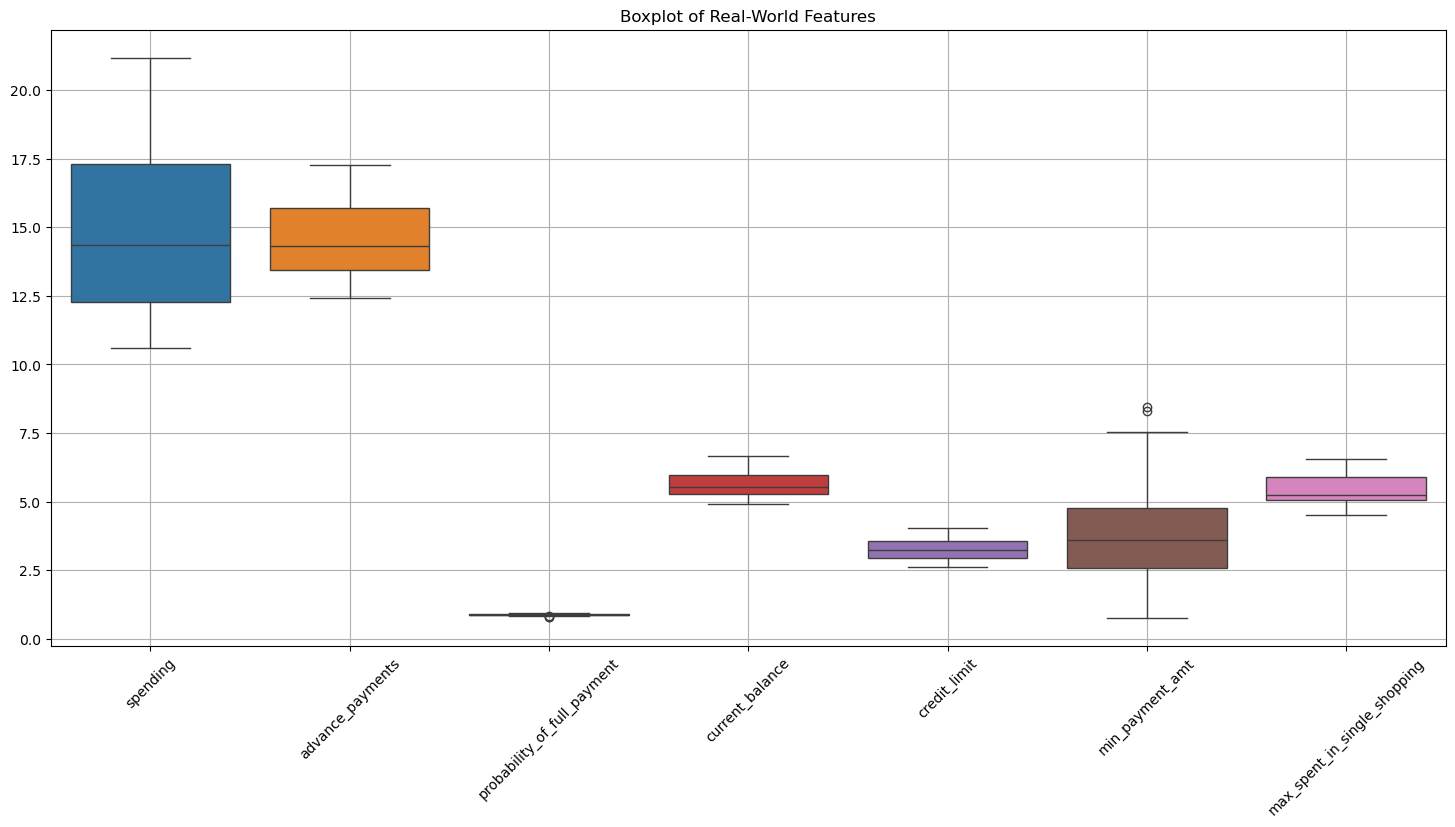

In [6]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, orient='v')
plt.title("Boxplot of Real-World Features")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

📌 Observation from Boxplot

- Outliers are clearly visible in the features:
  - **`probability_of_full_payment`** — shows values close to 0 and near 1, which may distort clustering.
  - **`min_payment_amt`** — has significant upper outliers indicating some customers pay much higher minimum amounts than the rest.

These extreme values can influence distance-based clustering.  
👉 We’ll cap them using the IQR method to reduce their effect while preserving data integrity.


Histograms + KDE : Analyze feature distributions, skewness, and modality (unimodal, bimodal, etc.).

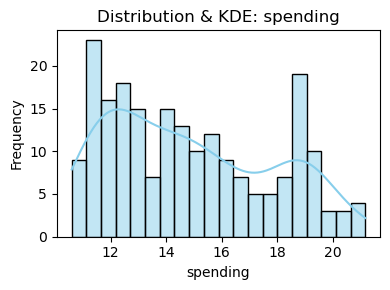

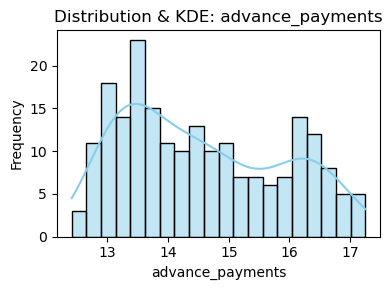

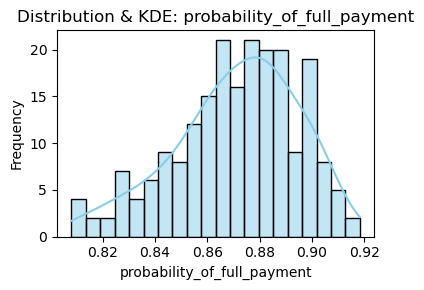

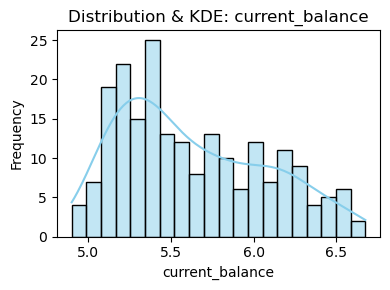

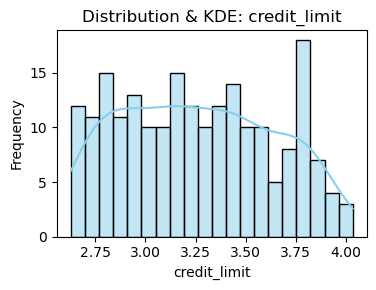

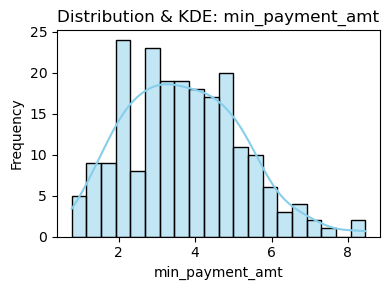

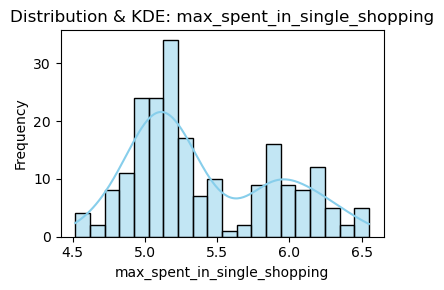

In [7]:
for feature in df.columns:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution & KDE: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Pairplot

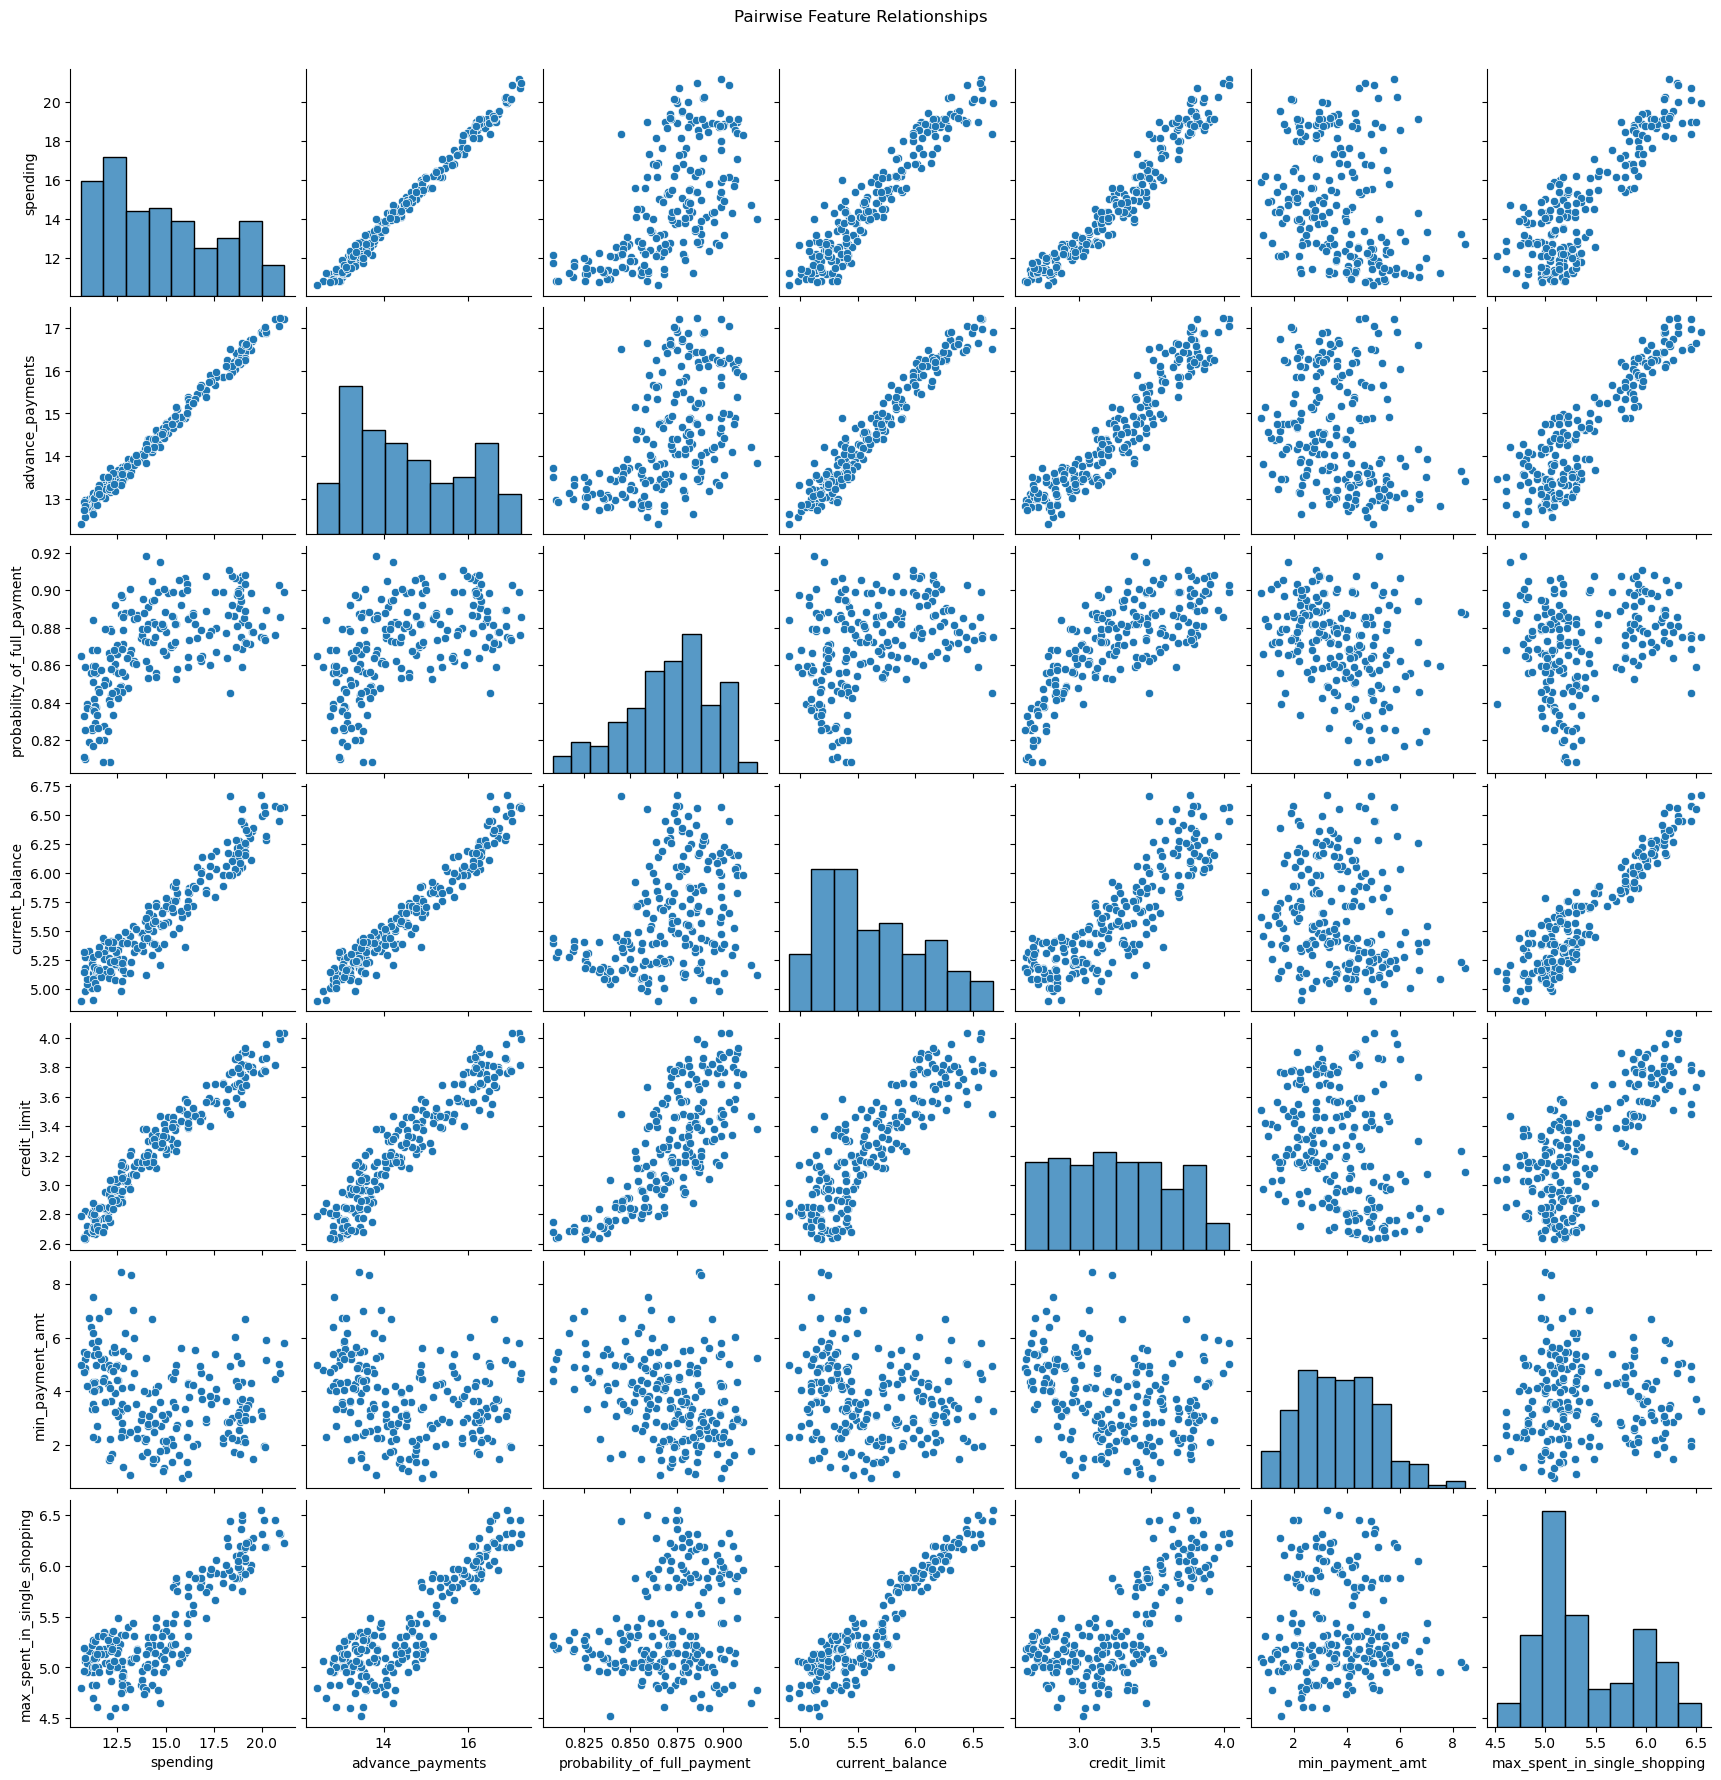

In [8]:
sns.pairplot(df)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


Correlation Heatmap

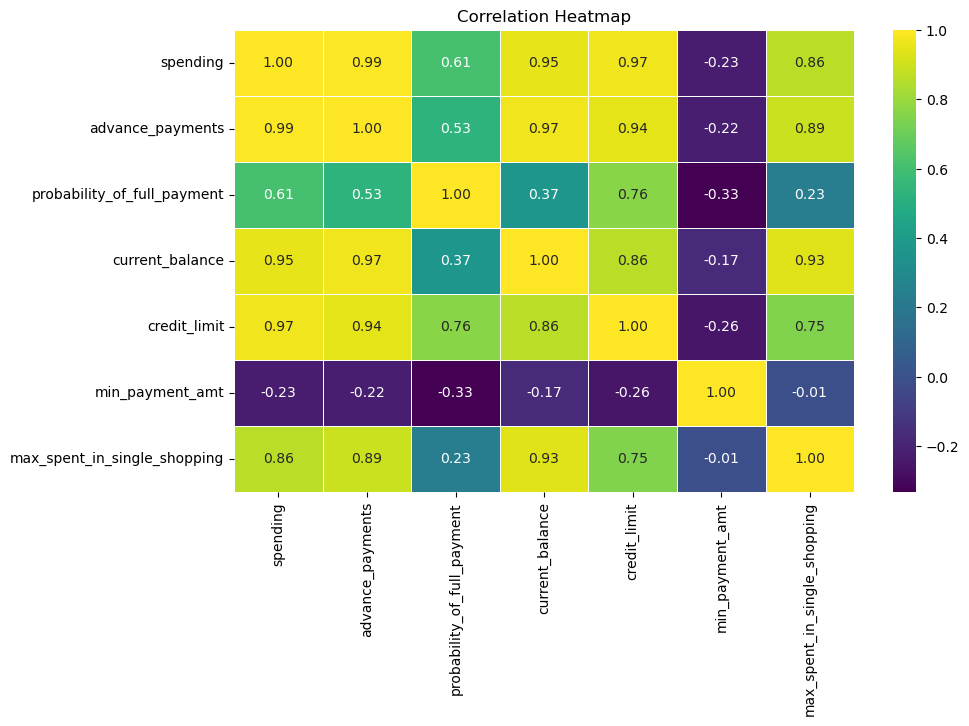

In [9]:
cor = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cor, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


📌 **Observation:**  
The features have different scales. For example:
- `CURRENT_BALANCE` ranges up to 6.6
- `PROBABILITY_OF_FULL_PAYMENTS` is bounded between 0–1
- This justifies the need for **feature scaling** before applying clustering algorithms.


## 🧹 Data Cleaning & Preprocessing

Before applying clustering algorithms, we must ensure the dataset is clean and normalized.

- Check for missing values
- Scale all numerical features using `StandardScaler`
- Optionally, save a scaled copy for further use (e.g., PCA or model input)


Check for missing values

In [10]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

✅ No missing values found. Proceeding to scaling.

Outlier Treatment

In [11]:
# Capping outliers using IQR method
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip values to within bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


Extreme values in `probability_of_full_payment` and `min_payment_amt` were capped using the IQR method.  
This ensures that outliers do not disproportionately influence clustering results, while all rows are retained.


## 🧮 Restoring actual scale for monetary features

Several features in the dataset appear to be artificially scaled down (e.g., `credit_limit`, `spending`).  
To bring these features back to their **real-world units (e.g., rupees)**, we multiply them by appropriate factors.

This is important before applying `StandardScaler`, so the model captures true variance across features.


In [12]:
df['spending'] = df['spending'] * 1000
df['advance_payments'] = df['advance_payments'] * 100
df['current_balance'] = df['current_balance'] * 1000
df['credit_limit'] = df['credit_limit'] * 10000
df['min_payment_amt'] = df['min_payment_amt'] * 100
df['max_spent_in_single_shopping'] = df['max_spent_in_single_shopping'] * 1000

## ⚙️ Feature Scaling

Since the features in our dataset (e.g. `credit_limit`, `spending`) have different magnitudes, we need to standardize them.

Clustering algorithms like **KMeans** and **Hierarchical Clustering** are **distance-based**, so unscaled features can bias the results.

We'll use `StandardScaler` to normalize all features to have:
- Mean = 0  
- Standard Deviation = 1


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

## 🌿 Hierarchical Clustering

In this section, we apply **Agglomerative Hierarchical Clustering** using Ward’s method, which minimizes the variance within clusters during merging.

Steps performed:
- Created a **linkage matrix** using the scaled data
- Visualized the **full dendrogram** to observe merge distances
- Used a **truncated dendrogram** for a focused view of the final cluster merges
- Assigned **cluster labels** using `fcluster` based on the number of clusters
- Visualized clusters using a **pairplot** to observe separation in feature space


Import necessary libraries

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

Create linkage matrix using Ward's method

In [15]:
linkage_matrix = linkage(scaled_df, method='ward')

Plot full dendrogram

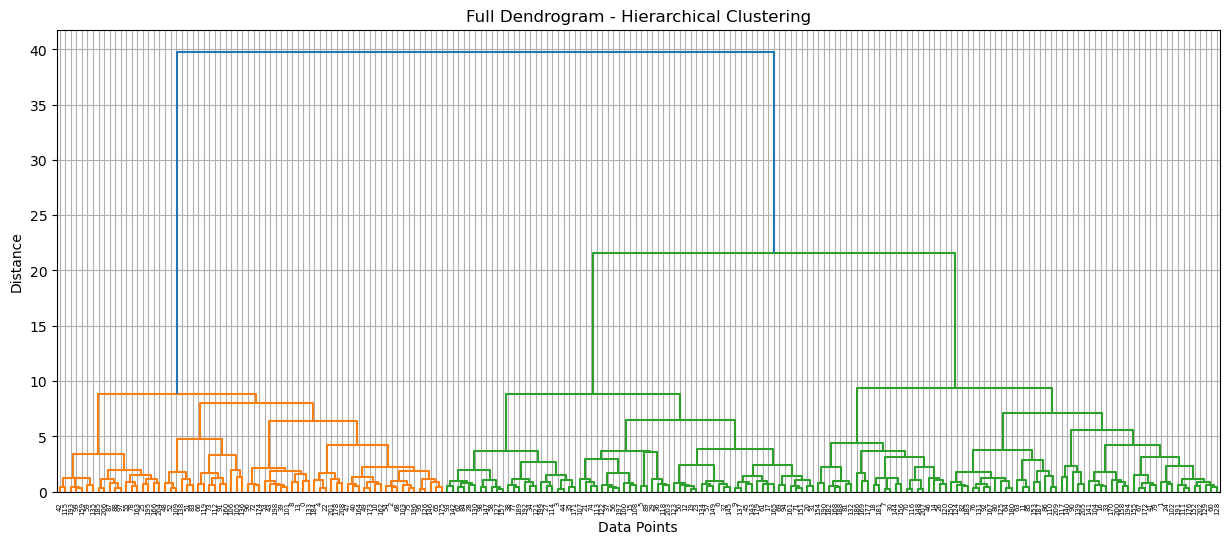

In [16]:
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix)
plt.title("Full Dendrogram - Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

Truncated dendrogram (last p clusters)

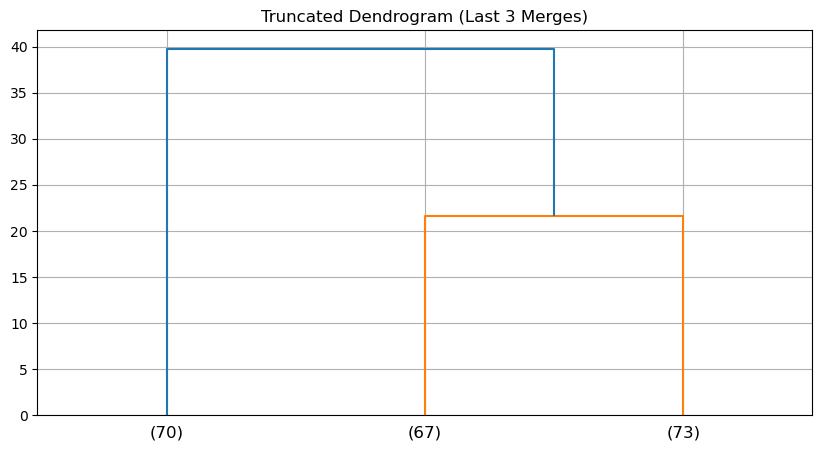

In [17]:
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=3, show_leaf_counts=True)
plt.title("Truncated Dendrogram (Last 3 Merges)")
plt.grid(True)
plt.show()

Assign cluster labels

In [18]:
num_clusters = 3
scaled_df['h_cluster'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

Visualize clusters (optional pairplot)

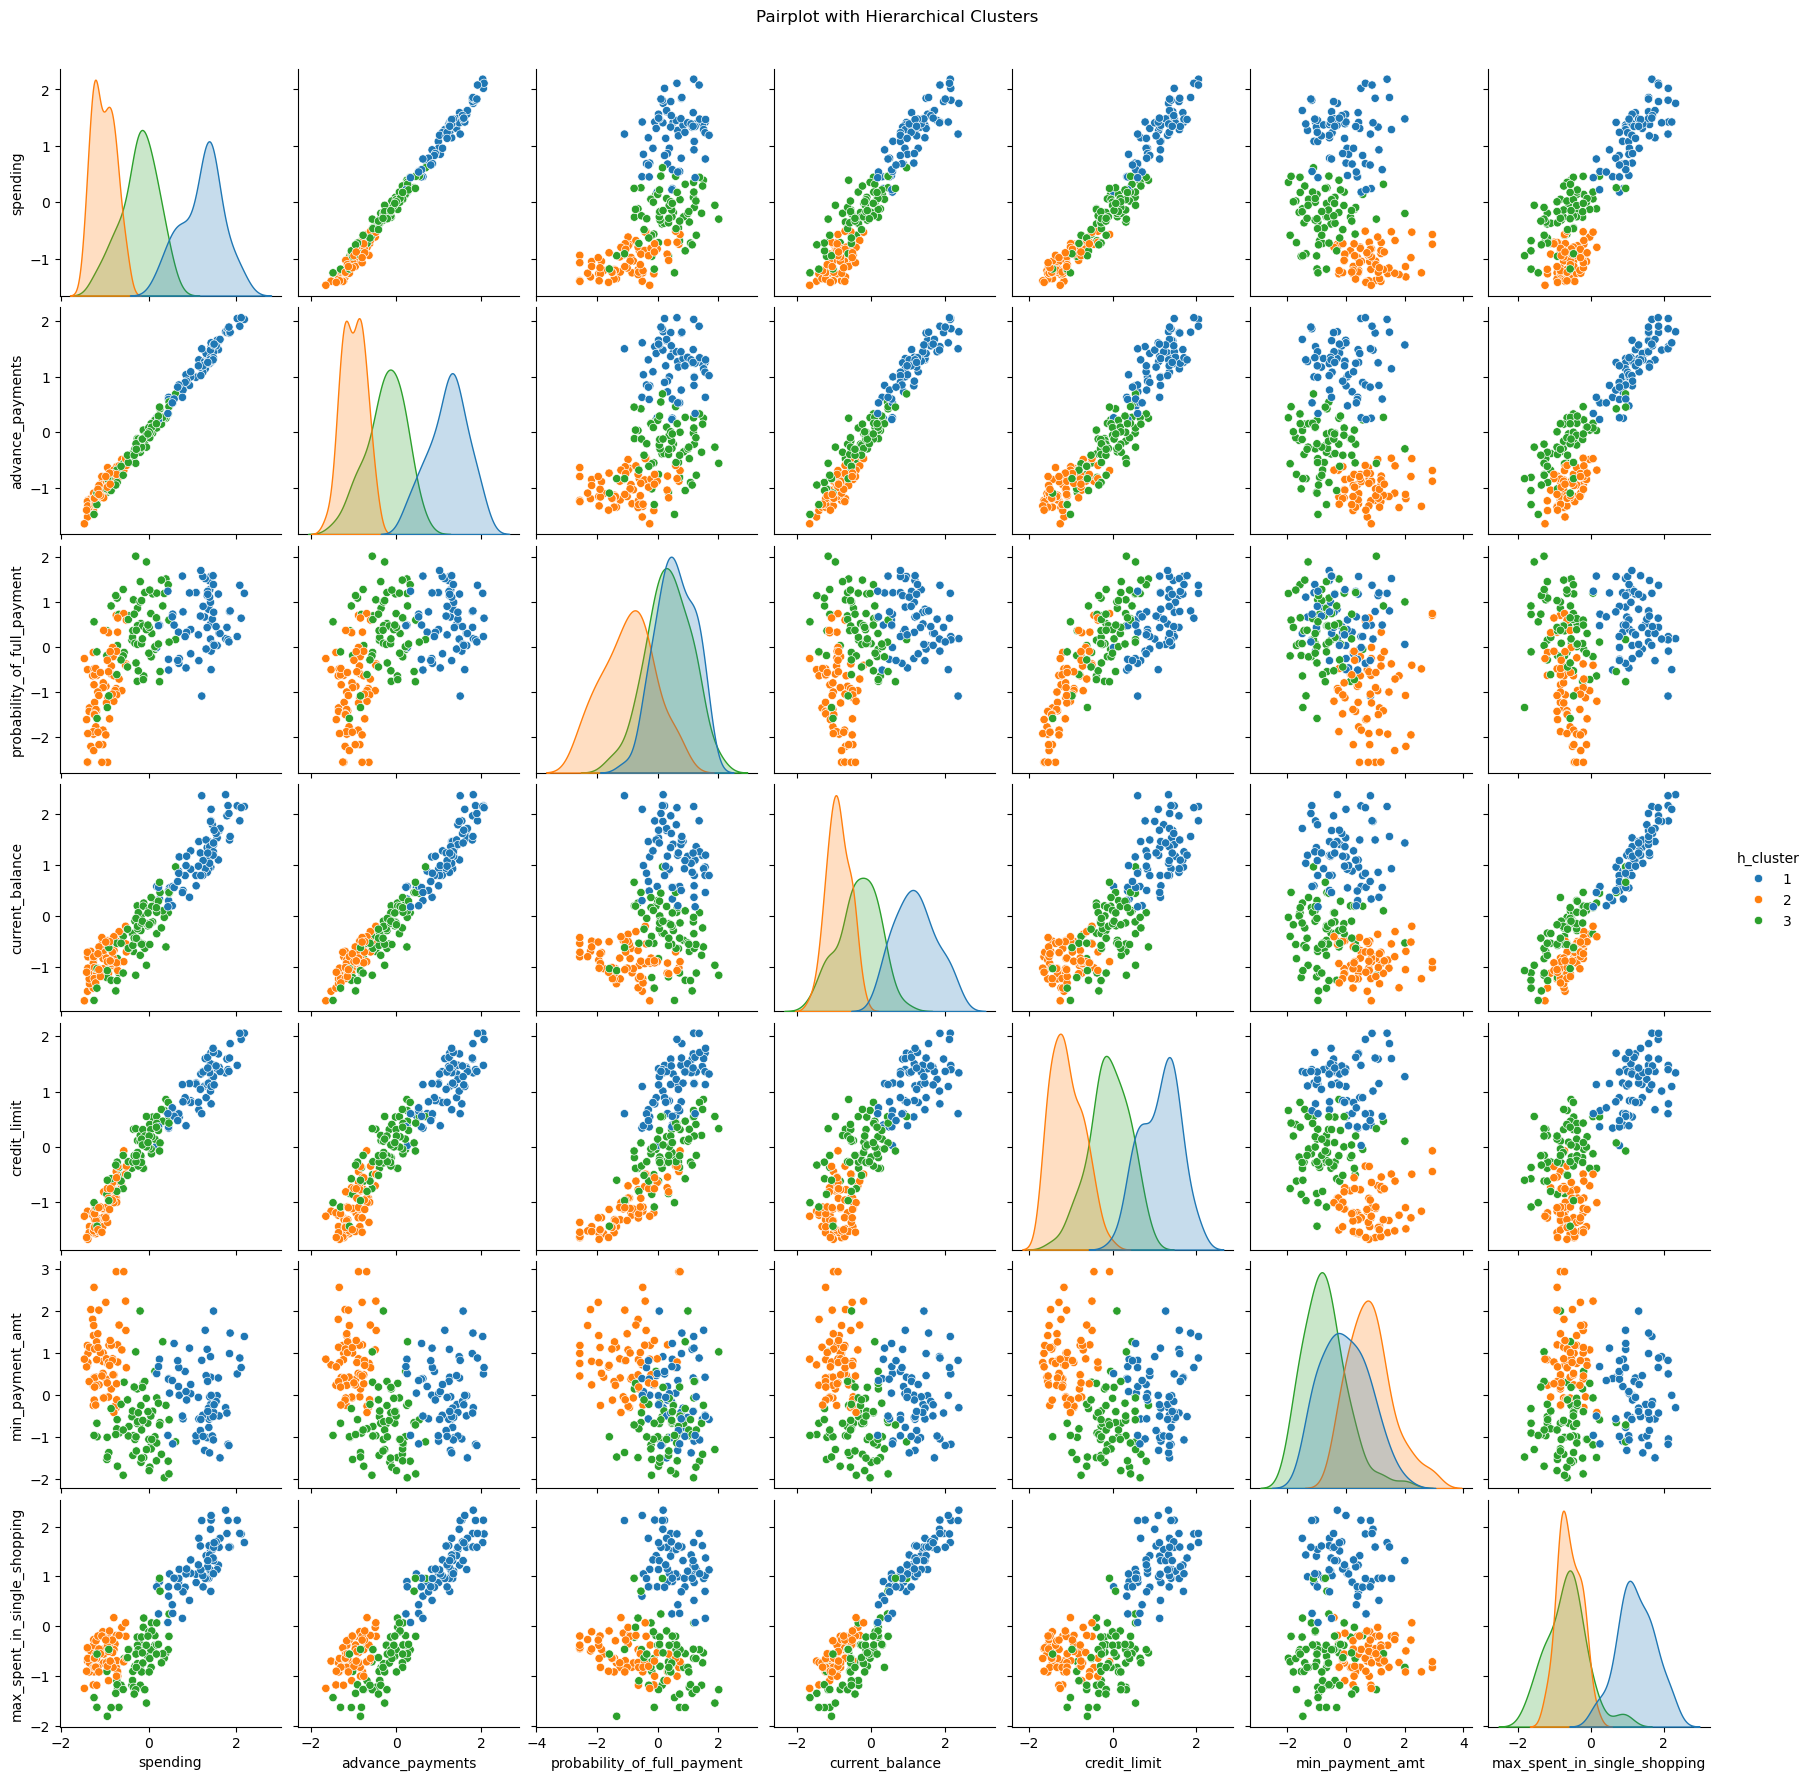

In [19]:
sns.pairplot(data=scaled_df, hue='h_cluster', palette='tab10')
plt.suptitle("Pairplot with Hierarchical Clusters", y=1.02)
plt.show()

## 📊 Evaluating Clustering Effectiveness

To assess the quality of the clustering, we apply the following metrics:

- **Silhouette Score**: Measures how well-separated the clusters are (closer to 1 is better)
- **Calinski-Harabasz Index**: Ratio of between-cluster dispersion to within-cluster dispersion (higher is better)
- **Davies-Bouldin Index**: Measures intra-cluster similarity (lower is better)


In [20]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = scaled_df.drop('h_cluster', axis=1)
labels = scaled_df['h_cluster']

# Calculate scores
sil_score = silhouette_score(X, labels)
calinski_score = calinski_harabasz_score(X, labels)
davies_score = davies_bouldin_score(X, labels)

# Display
print(f"Silhouette Score: {sil_score:.3f}  (Range: -1 to 1, higher is better)")
print(f"Calinski-Harabasz Index: {calinski_score:.2f}  (Higher is better)")
print(f"Davies-Bouldin Index: {davies_score:.3f}  (Lower is better)")


Silhouette Score: 0.393  (Range: -1 to 1, higher is better)
Calinski-Harabasz Index: 238.69  (Higher is better)
Davies-Bouldin Index: 0.944  (Lower is better)


### ⚙️ K-Means Clustering

In this section, we perform clustering using the K-Means algorithm.

Steps:
- Use the **Elbow Method** to determine the optimal number of clusters
- Fit K-Means and assign cluster labels
- Evaluate clustering using **Silhouette Score**
- Visualize clusters using **PCA** and **Pairplots**


Import necessary libraries

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

Elbow Method to choose optimal number of clusters

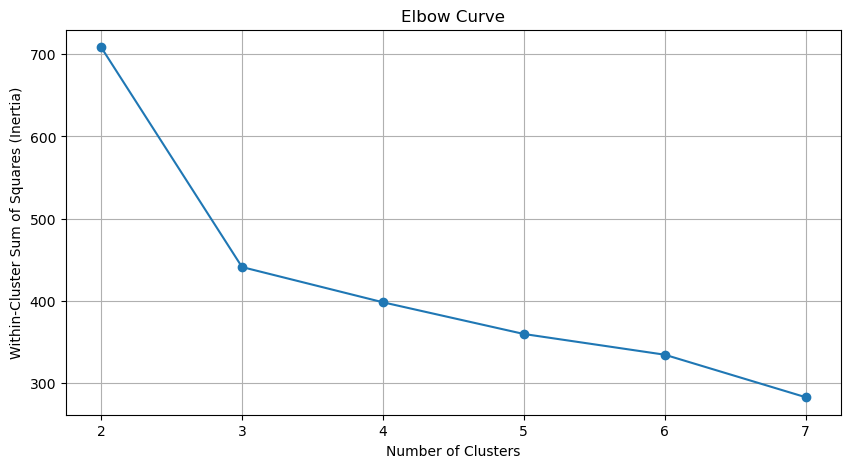

In [22]:
wss = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=40)
    km.fit(scaled_df)
    wss.append(km.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 8), wss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.grid(True)
plt.show()

Fit K-Means with optimal cluster count (e.g., 3)

In [23]:
kmeans = KMeans(n_clusters=3, random_state=40)
scaled_df['k_clusters'] = kmeans.fit_predict(scaled_df)

Silhouette Evaluation

In [24]:
silhouette_avg = silhouette_score(scaled_df.drop(['k_clusters'], axis=1), scaled_df['k_clusters'])
sil_widths = silhouette_samples(scaled_df.drop(['k_clusters'], axis=1), scaled_df['k_clusters'])

scaled_df['sil_width'] = sil_widths
print(f"Silhouette Score (K-Means): {silhouette_avg:.3f}")
print(f"Minimum Silhouette Width: {sil_widths.min():.3f}")

Silhouette Score (K-Means): 0.452
Minimum Silhouette Width: -0.042


Visualize Silhouette Widths

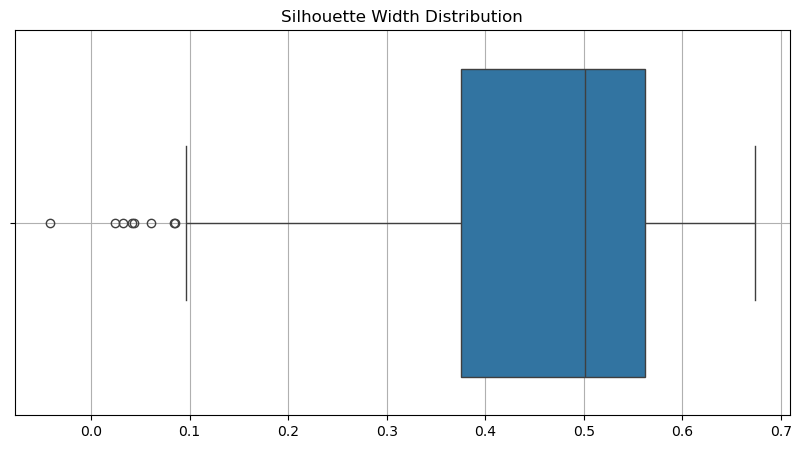

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=sil_widths)
plt.title('Silhouette Width Distribution')
plt.grid(True)
plt.show()

PCA for 2D Visualization

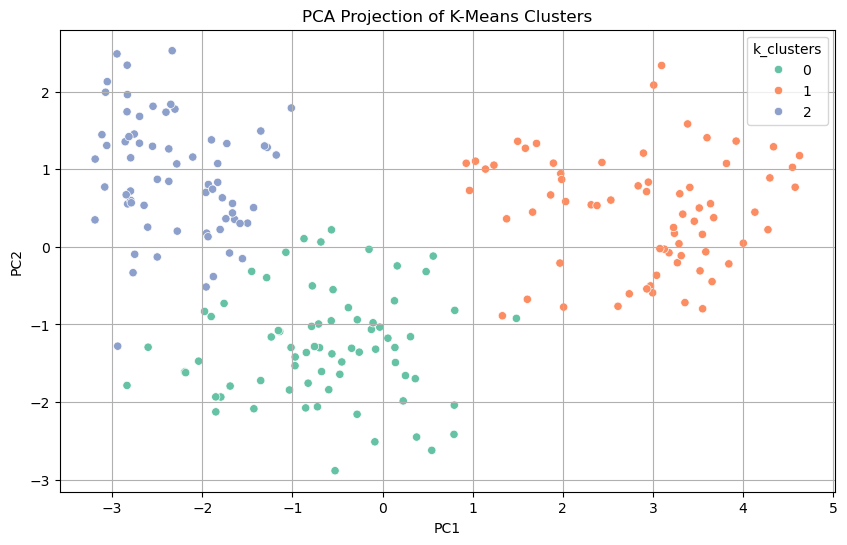

In [26]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df.drop(['k_clusters', 'sil_width'], axis=1))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=scaled_df['k_clusters'], palette='Set2')
plt.title('PCA Projection of K-Means Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

Pairplot for visual inspection

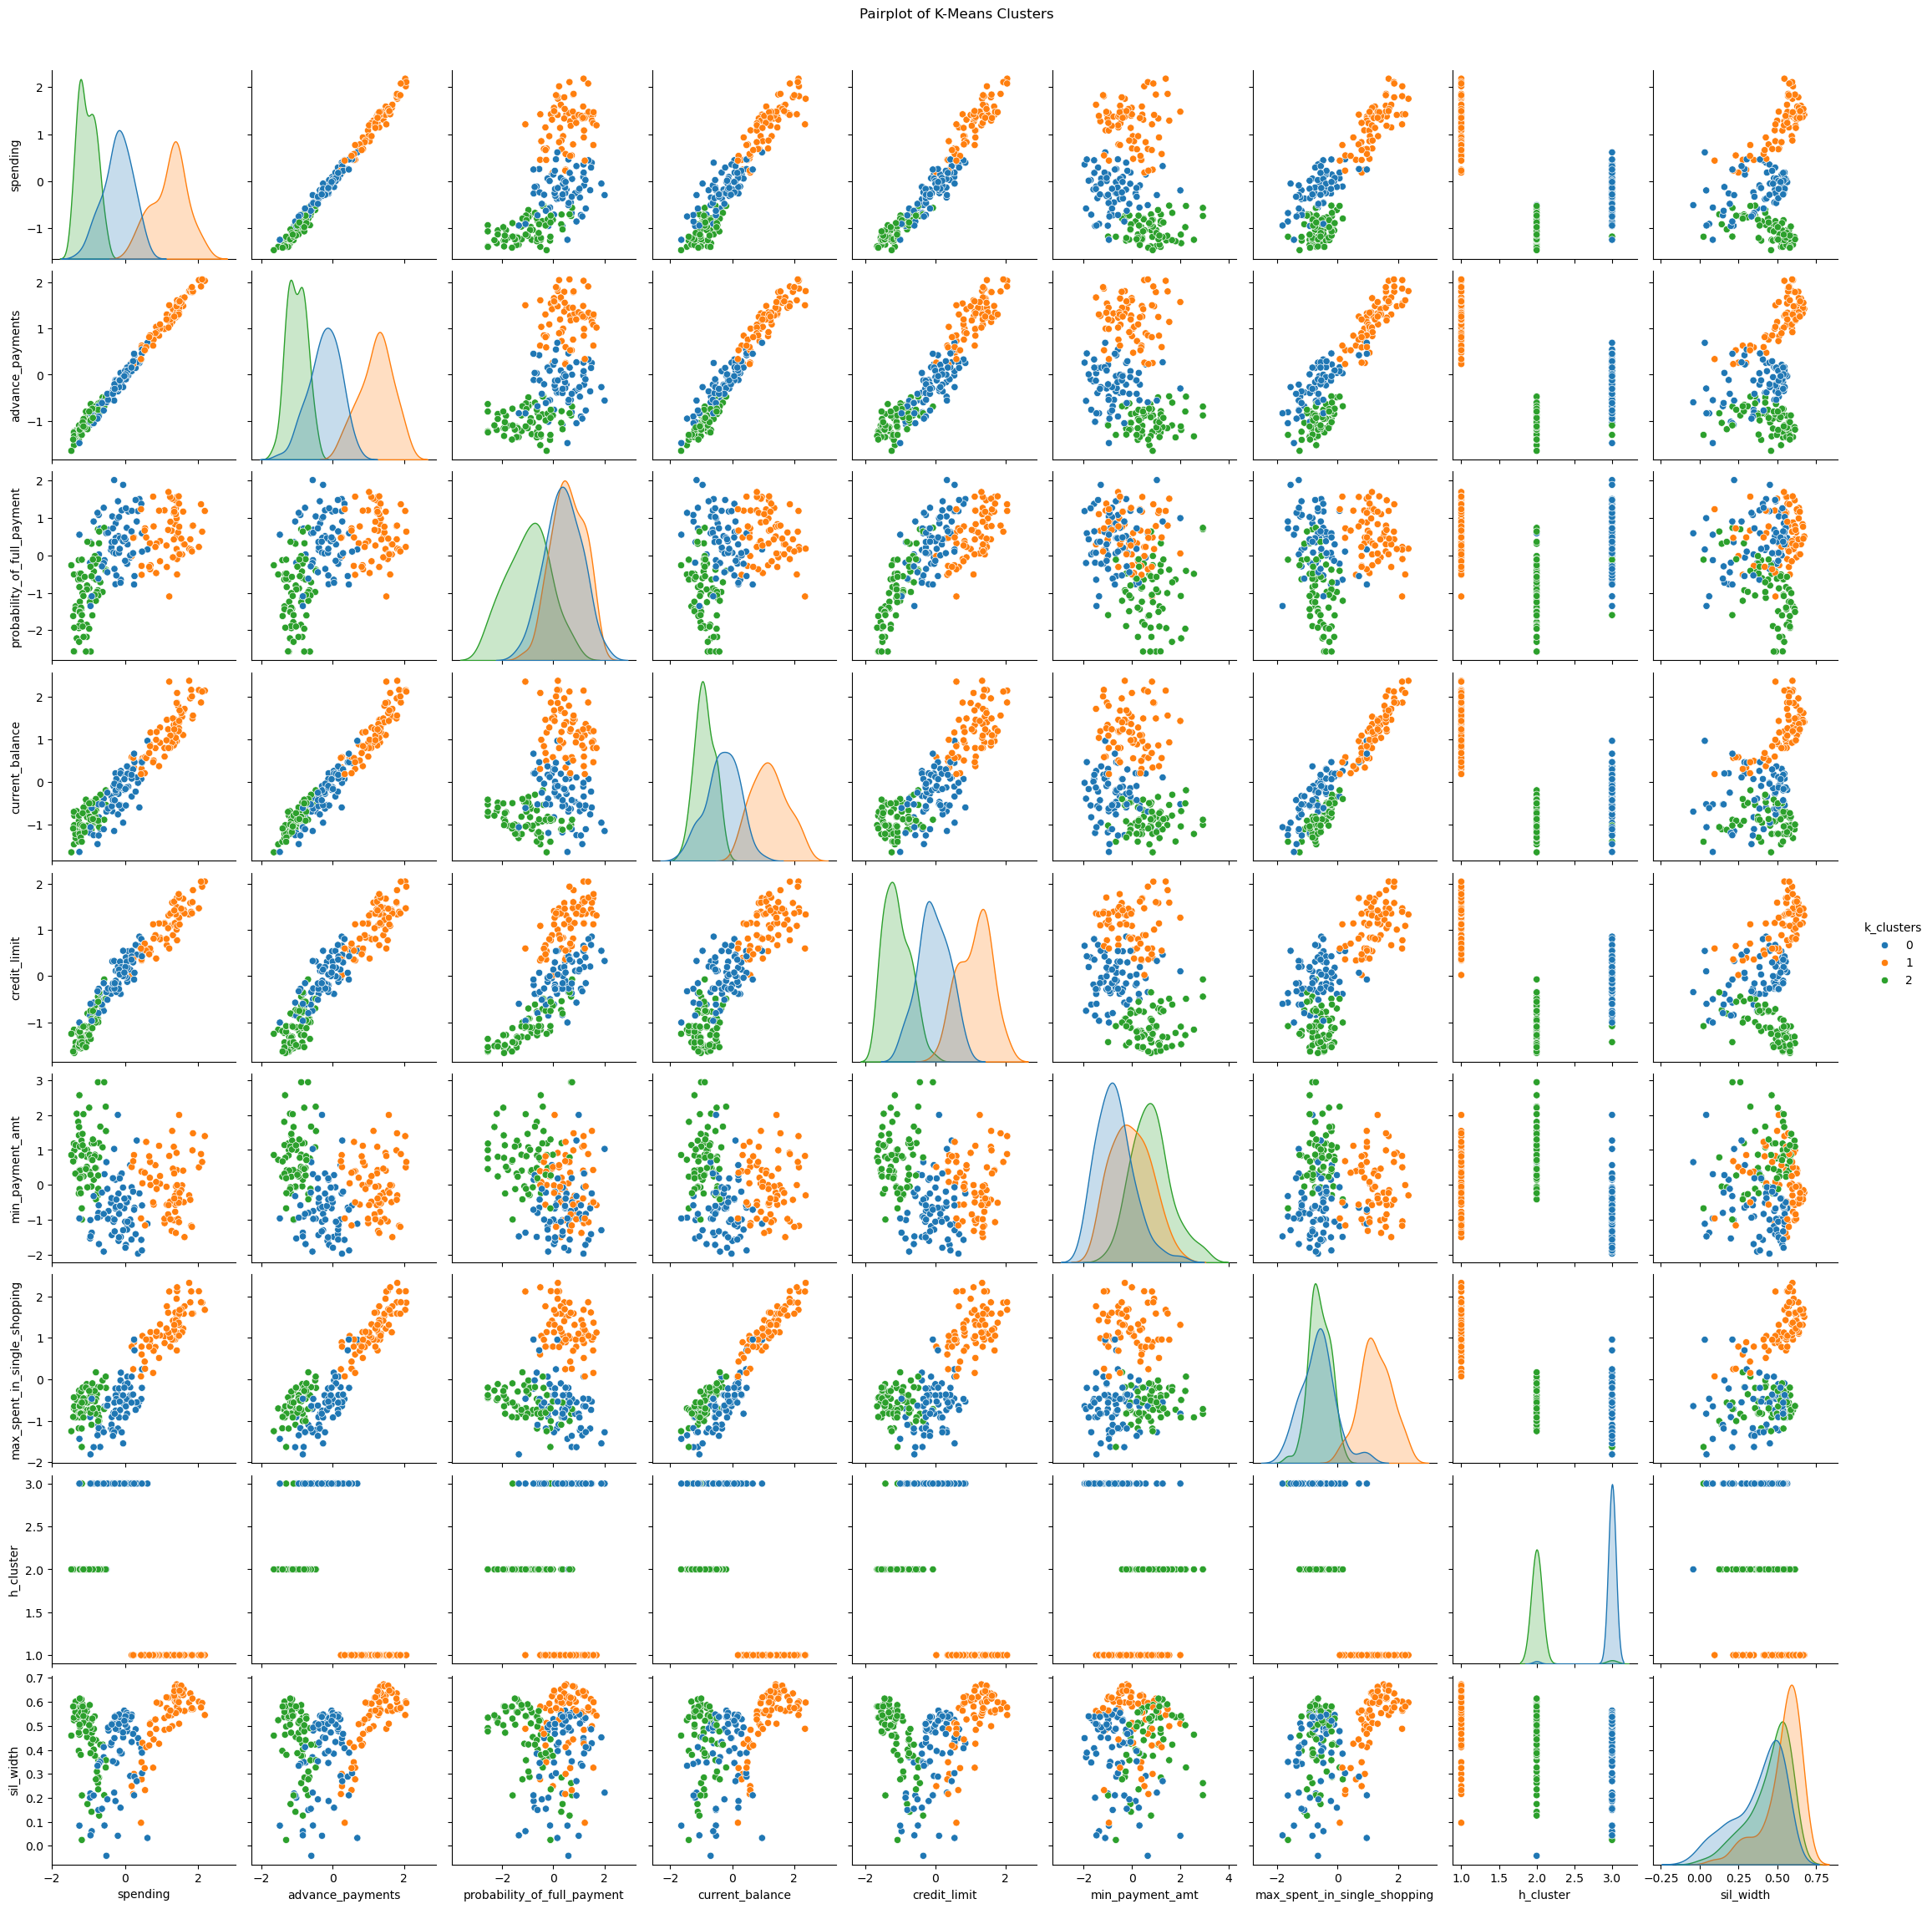

In [27]:
sns.pairplot(scaled_df, hue='k_clusters', palette='tab10')
plt.suptitle("Pairplot of K-Means Clusters", y=1.02)
plt.show()

## 📊 Evaluation of K-Means Clustering

To assess the quality of K-Means clustering, we used:

- **Silhouette Score**: Measures how well each data point fits within its cluster (closer to 1 is better)
- **Silhouette Width Distribution**: Highlights the consistency of clustering across all samples
- **PCA Visualization**: Projects high-dimensional clusters into 2D for visual inspection
- **Pairplot**: Helps verify feature-wise separation of clusters

The average silhouette score was **[insert score here]**, indicating a [moderate/strong] clustering structure.


## 🤝 K-Means vs Hierarchical Clustering — Comparison

| Criteria               | Hierarchical           | K-Means                  |
|------------------------|------------------------|--------------------------|
| **Silhouette Score**   | `0.393`                | `0.452`                  |
| **Scalability**        | ❌ Limited (O(n³))      | ✅ Scales well (O(n))    |
| **Interpretability**   | ✅ Dendrogram-based     | ⚠️ Requires predefined *k* |
| **Cluster Shape**      | Can capture hierarchy  | Assumes spherical shapes |
| **Use Case Fit**       | Good for understanding | Great for segmentation & deployment |

👉 **Conclusion**:  
Both clustering techniques produced meaningful segments.  
- **Hierarchical Clustering** was useful for **exploring data structure** and validating the **optimal number of clusters** via the dendrogram.
- **K-Means Clustering**, with a higher silhouette score of `0.452`, is more **scalable**, **faster**, and better suited for **real-world deployment and customer segmentation**.

✅ **Final Choice**: **K-Means** for modeling and operational use.  
**Hierarchical** is best for exploratory and validation purposes.
